IA & Data science -- 2017-2018
--------
*&copy; Equipe pédagogique: Ludovic Denoyer, Thibault Laugel, Marie-Jeanne Lesot, Christophe Marsala, Olivier Schwander*

# TD-TME09: études et améliorations des K-moyennes

<font size="+1">**[Q]**</font> **Indiquer dans la boîte ci-dessous vos noms et prénoms :**

*Double-cliquer ici et insérer les noms et prénoms de votre binôme*

## Préparation

Décompresser l'archive, elle crée le répertoire "tp9" qui contient :
- un fichier ipython à ouvrir (ce fichier-ci)
- un sous-répertoire "data" contenant les bases d'apprentissage utilisées dans cette séance
- un sous-répertoire "IADS2018" (qui contient 2 fichiers python) dont l'utilisation est détaillée un peu plus loin dans ce fichier ipython.

Le but de ce TP est de compléter ce document ipython en ajoutant les fonctions demandées. Avant de commencer, exécuter le bloc suivant afin de pouvoir initialiser des variables utiles 


In [1]:
import numpy as np
import pandas as pd
from datetime import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline  

### Chargement du fichier "base_2D.csv"

In [2]:
data_2D = pd.read_csv("data/base-2D.csv")
data_2D[0:5]  # ou bien: data_2D[0:len(data_2D)]

,X,Y
0,0.0,4.0
1,1.0,3.5
2,1.0,1.0
3,2.0,1.0
4,2.0,2.0


Dans la suite de ce TP, il est conseillé de travailler sur des données de type <tt>DataFrame</tt> le plus souvent possible.

**Important**: dans la suite de ce TP, on appelle:

- "base d'apprentissage" le DataFrame contenant l'ensemble des exemples d'apprentissage chargés par la commande précédenteµ
- "base d'exemples" : un DataFrame contenant un ensemble d'exemples (remarque: la base d'apprentissage est le plus grand ensemble d'exemples possible)

## Construction d'un package de fonctions

Dans un premier temps, afin de pouvoir utiliser toutes les fonctions écrites dans le TP précédent (fonctions pour les K-moyennes), vous allez réaliser un package de fonctions qui s'appelle "<tt>IADS2018</tt>".

Le package <tt>IADS2018</tt> est composé ainsi :
- c'est un répertoire dont le nom est <tt>IADS2018</tt>
- ce répertoire contient le fichier <tt>\__init\__.py</tt> qui, dans notre cas, est un fichier vide (mais il est important que ce fichier existe !)
- ce répertoire contient le fichier <<tt>kmoyennes.py</tt> qui est le fichier dans lequel vous devez mettre toutes les fonctions écrites lors du TP précédent sur les K-moyennes.

<font size="+1" color="RED">**[Q]**</font> En utilisant votre éditeur de texte préféré (emacs, gedit, vim,...) ouvrir le fichier <tt>kmoyennes.py</tt> qui se trouve dans le sous-répertoire <tt>IADS2018</tt> et compléter-le en reprenant les fonctions que vous avez écrites dans la séance précédente.

Une fois le fichier <tt>kmoyennes.py</tt> complété et sauvegardé, il est possible d'utiliser les fonctions qui y sont définies en utilisant une commande d'importation:

In [3]:
# Importation des fonctions écrites dans les fichiers python que contient le répertoire (package) IADS2018:
import IADS2018 
import IADS2018.kmoyennes as km

#### Vérification que tout fonctionne bien

Si la recopie de toutes vos fonctions s'est bien déroulée, une fois l'importation faite il est possible de tester les instructions des boites suivantes:

---> type de DataFnorm: <class 'pandas.core.frame.DataFrame'>


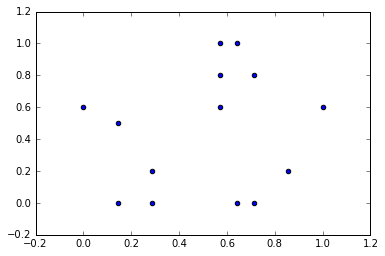

In [4]:
# Affichage des points après normalisation:

DataFnorm = km.normalisation(data_2D)
print("---> type de DataFnorm:",type(DataFnorm))

plt.scatter(DataFnorm['X'],DataFnorm['Y'])

Iteration  0  Inertie :  1.25678571429  Difference :  1.7192055393586014
Iteration  1  Inertie :  1.25678571429  Difference :  0.0


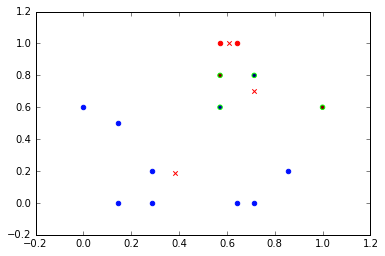

In [5]:
les_centres, l_affectation = km.kmoyennes(3, DataFnorm, 0.05, 100)

km.affiche_resultat(DataFnorm,les_centres,l_affectation)

## Travail à réaliser

On peut reprendre les fonctions écrites dans les tp sur l'apprentissage supervisé pour générer des ensembles de points en 2 dimensions afin de tester la fonction <tt>kmoyennes()</tt>. 
Par exemple, pour générer des points répartis en 2 groupes:

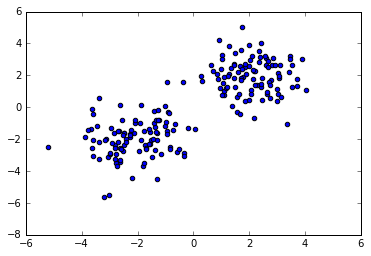

In [6]:
def createGaussianDataset(group1_center,group2_center,sigma,nb_points):
        group1 = np.random.multivariate_normal(group1_center,sigma,nb_points)
        group2 = np.random.multivariate_normal(group2_center,sigma,nb_points)
        
        return np.concatenate((group1, group2))

# Utilisation de cette fonction :
the_set = createGaussianDataset(np.array([2,2]),np.array([-2,-2]),np.array([[1.1,0],[0,1.1]]),100)

# Affichage des points obtenus
data_random = pd.DataFrame(the_set, columns = ['X', 'Y'])
plt.scatter(data_random['X'],data_random['Y'])

# Normalisation pour pouvoir utiliser la fonction kmoyennes() par la suite:
DataRandom = km.normalisation(data_random)

<font size="+1" color="RED">**[Q]**</font> Tester la fonction <tt>kmoyennes()</tt> sur le jeu de données généré en utilisant différentes valeurs de $K$.

Iteration  0  Inertie :  3.83992461858  Difference :  17.4432584363688
Iteration  1  Inertie :  3.67645718237  Difference :  0.16346743620896742
Iteration  2  Inertie :  3.66358801265  Difference :  0.012869169719135876


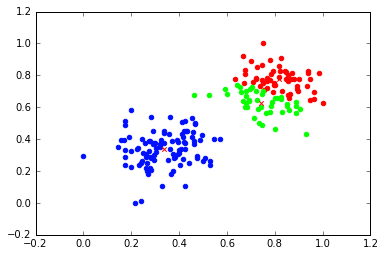

In [7]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  3.95896686816  Difference :  17.324216186787687
Iteration  1  Inertie :  3.69191765238  Difference :  0.2670492157793052
Iteration  2  Inertie :  3.68159404368  Difference :  0.010323608699929654


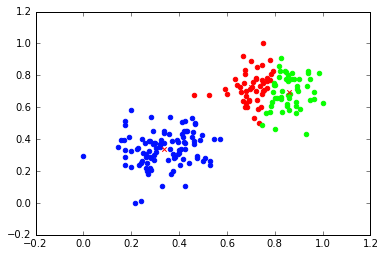

In [8]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(3, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  19.2767833789  Difference :  2.006399676051622
Iteration  1  Inertie :  7.57849022319  Difference :  11.698293155707592
Iteration  2  Inertie :  4.36803201944  Difference :  3.2104582037472467
Iteration  3  Inertie :  4.3468634276  Difference :  0.0211685918369664


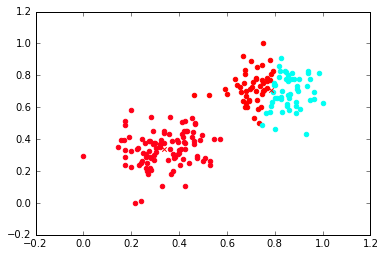

In [9]:
les_centresRand1, l_affectationv = km.kmoyennes(2, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  3.23731907072  Difference :  18.04586398422971
Iteration  1  Inertie :  3.08818016191  Difference :  0.14913890881156577
Iteration  2  Inertie :  3.06443230874  Difference :  0.023747853169514777


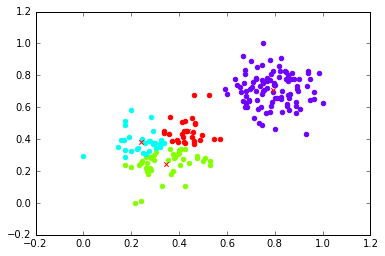

In [10]:
les_centresRand1, l_affectationRand1 = km.kmoyennes(5, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand1,l_affectationRand1)

Iteration  0  Inertie :  2.24255332772  Difference :  19.04062972722844
Iteration  1  Inertie :  2.04826213728  Difference :  0.19429119043727106
Iteration  2  Inertie :  1.99378602383  Difference :  0.054476113452478714
Iteration  3  Inertie :  1.97820342463  Difference :  0.015582599199953862


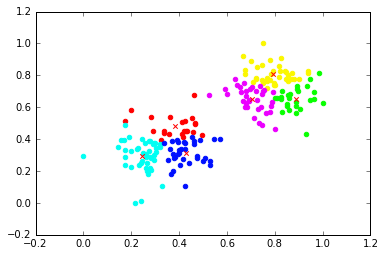

In [11]:
les_centresRand2, l_affectationRand2 = km.kmoyennes(6, DataRandom, 0.05, 100)

km.affiche_resultat(DataRandom,les_centresRand2,l_affectationRand2)

## Evaluation du résultat d'un clustering

L'évaluation du résultat d'un clustering, c'est-à-dire la mesure de la "qualité" des clusters obtenus, s'effectue selon 2 critères :
- la **compacité** des clusters obtenus
- la **séparabilité** des clusters obtenus


### Mesurer la compacité d'un cluster

Il existe plusieurs possibilités pour définir une mesure de compacité d'un cluster. 

Une telle mesure évalue la proximité des exemples qui sont affectés au cluster.

Exemples de mesures de compacité (en utilisant les notations du cours) :
- la mesure $J_k$ qui mesure l'inertie intra-cluster et qui a été implémentée dans la fonction <tt>inertie_cluster()</tt>

- la mesure de distance intra-cluster $D_{k}$ qui évalue la distance maximale entre 2 exemples d'un même cluster pour l'ensemble des clusters obtenus:
$$D_k = \max_{x, y \in C_k } (d_{E}(x,y))$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>dist_intracluster</tt> qui, étant donné un ensemble d'exemples, correspondant aux exemples d'un même cluster, rend la valeur de la distance intra-cluster correspondante.

In [12]:
def dist_intracluster(df):
    maxdist=0
    for i in range(len(df)):
        for j in range(i+1,len(df)):
           
            dist=km.dist_vect(df.iloc[i],df.iloc[j])
            if(maxdist<dist):
                maxdist=dist
            
    return maxdist

In [13]:
# Avec les données jouet:
for k in range(0,len(l_affectation)):
    DF = DataFnorm.iloc[l_affectation[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.00255102040816	distance = 0.0714285714286
pour 1 : inertie = 0.162448979592	distance = 0.472941295921
pour 2 : inertie = 1.09178571429	distance = 0.945882591843


In [14]:
# Avec les données générées aléatoirement:
for k in range(0,len(l_affectation)):
    DF = DataRandom.iloc[l_affectationRand2[k]]
    print("pour "+str(k)+" : inertie = " + str(km.inertie_cluster(DF)) + "\tdistance = "+  str(dist_intracluster(DF)))


pour 0 : inertie = 0.247137952695	distance = 0.33392846394
pour 1 : inertie = 0.299582504971	distance = 0.295629300543
pour 2 : inertie = 0.222960091907	distance = 0.385481927698


Etant donné une partition $P$, on peut mesurer la compacité globale des clusters de cette partition en agrégeant les compacités intra-custer de chaque cluster.

Ainsi, dans notre cas, on peut définir 2 mesures de compacité globable:
- la compacité inertielle $Co_{inertie}$ d'une partition $P$:
    $$Co_{inertie}(P) = J(P)$$
- la compacité intra-clusters $Co_{dist}$ d'une partition $P$
$$Co_{dist}(P) = \max_{k=1..K} D_k$$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>global_intraclusters</tt> qui, étant donné une base d'exemples et un 
dictionnaire d'affectation d'exemples à des clusters rend la valeur de la distance intra-clusters correspondante.

In [15]:
def global_intraclusters(df,la):
    
    maxdist=0
    
    for k, liste in la.items():
        
        dist=dist_intracluster(df.iloc[liste])
        
        if(maxdist<dist):
            maxdist=dist
            
    
    return maxdist
    

In [16]:
# Exemples:
print("Données jouet: "+str(global_intraclusters(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(global_intraclusters(DataRandom,l_affectationRand2)))

print("Avec l'inertie :")
print("Données jouet: "+str(km.inertie_globale(DataFnorm,l_affectation)))
print("Données aléatoire: "+str(km.inertie_globale(DataRandom,l_affectationRand2)))


Données jouet: 0.945882591843
Données aléatoire: 0.490338465157
Avec l'inertie :
Données jouet: 1.25678571429
Données aléatoire: 1.97820342463


### Mesurer la séparabilité

Une mesure de séparabilité évalue la distance entre les groupes d'un clustering d'une partition $P$ donnée.

Il existe plusieurs mesures de ce genre, par exemple, la mesure la plus évidente est la distance minimale entre deux clusters de la :
    $$Se_{min}(P) = \min_{k= 1..K, l=1..K}(d_E(c_k,c_l)) $$


<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>sep_clusters</tt> qui, étant donné un ensemble de centres rend la valeur de la distance minimale entre 2 centres.
    

In [17]:
def sep_clusters(centroids):
    
    mindist=10000000000
    
    for i in range(len(centroids)):
        for j in range(i+1,len(centroids)):
            
            dist=km.dist_vect(centroids.iloc[i], centroids.iloc[j])
            
            if(mindist>dist):
                mindist=dist
                
    
    return mindist
            

In [18]:
# Avec les données jouet:
print("Séparabilité: "+str(sep_clusters(les_centres)))


Séparabilité: 0.318558616014


In [19]:
# Avec les données générées aléatoirement:
print("Séparabilité: "+str(sep_clusters(les_centresRand2)))


Séparabilité: 0.177414414963


### Evaluation d'un clustering

Pour obtenir une évaluation du résultat d'un clustering, on combine une mesure de sa séparabilité et une mesure de sa compacité globale.
Par exemple (remarque: nous donnons ici des versions adaptées à notre tp de ces mesures):
- index de Dunn d'une partition $P$:
$$I_{Dunn}(P)= \frac{Co_{dist}(P)}{Se_{min}(P)}$$

- index de Xie et Beni d'une partition $P$:
$$I_{XB}(P) = \frac{Co_{inertie}(P)}{Se_{min}(P)}$$

Dans les 2 cas, une bonne partition minimise la valeur de l'index.

<font size="+1" color="RED">**[Q]**</font> Ecrire la fonction <tt>evaluation()</tt> qui prend en argument une chaîne de caractères donnant le nom de l'index choisi ("Dunn" ou "XB"), une base d'exemples, un ensemble de centres et une affectation, et rend la valeur de l'index correspondant.

In [20]:
def evaluation(index, df, centroids, la):
    
    if(index=="Dunn"):
        
        return global_intraclusters(df,la)/sep_clusters(centroids)
    
    elif(index=="XB"):
        
        return km.inertie_globale(df,la)/sep_clusters(centroids)
    
    else:
        return -1

In [21]:
print("Pour les données jouet:")
print("\tDunn:\t"+str(evaluation("Dunn",DataFnorm,les_centres,l_affectation)))
print("\tXB:\t"+str(evaluation("XB",DataFnorm,les_centres,l_affectation)))

print("Pour les données aléatoires (6 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand2,l_affectationRand2)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand2,l_affectationRand2)))

print("Pour les données aléatoires (5 clusters):")
print("\tDunn:\t"+str(evaluation("Dunn",DataRandom,les_centresRand1,l_affectationRand1)))
print("\tXB:\t"+str(evaluation("XB",DataRandom,les_centresRand1,l_affectationRand1)))


Pour les données jouet:
	Dunn:	2.96925760062
	XB:	3.94522593679
Pour les données aléatoires (6 clusters):
	Dunn:	2.76380284691
	XB:	11.1501843018
Pour les données aléatoires (5 clusters):
	Dunn:	3.43148262132
	XB:	17.6352811278


## Optimiser le nombre de clusters

La mesure d'évaluation d'un clustering précédente peut être utilisée pour déterminer automatiquement une bonne valeur pour $K$ (le nombre de clusters de la partition).

Ainsi, pour une base d'exemples $X$, l'approche suivante peut être utilisée :
- choisir une valeur pour $K$
- appliquer l'algorithme des K-moyennes avec cette valeur $K$ sur la base $X$
- évaluer le résultat du clustering obtenu en utilisant un index
- recommencer pour une autre valeur de $K$ et comparer le résultat, 
on choisit alors la valeur de $K$ qui a donné la meilleure partition selon le critère choisi.


<font size="+1" color="RED">**[Q]**</font> Implémenter l'approche d'optimisation du nombre de clusters. Vous devez tester des valeurs de $K$ de $2$ à $10$ et afficher la valeur optimale du nombre de clusters. Vous tracerez la courbe donnant la valeur de l'index obtenue pour chaque valeur de $K$ testée. Vous réaliserez cette expérimentation d'abord avec l'index de Dunn, puis avec l'index de Xie-Beni.

Tester plusieurs bases d'exemples, en particulier, construire des bases d'exemples aléatoires contenant plusieurs groupes (2, 3, 4, 5 groupes) et afficher la courbe de la variation de l'index pour des valeurs de $K$ variant de 2 à 10.

In [22]:
list_k=[]
list_eval_Dunn=[]
list_eval_XB=[]


for k in range(2,10):
    centroids, l_affectation = km.kmoyennes(k, DataRandom, 0.001, 100)
    list_k.append(k)
    list_eval_Dunn.append(evaluation("Dunn",DataRandom,centroids,l_affectation))
    list_eval_XB.append(evaluation("XB",DataRandom,centroids,l_affectation))
    

    
    

Iteration  0  Inertie :  20.2962339668  Difference :  0.9869490881499168
Iteration  1  Inertie :  9.77804871264  Difference :  10.51818525415408
Iteration  2  Inertie :  4.42894328301  Difference :  5.34910542963177
Iteration  3  Inertie :  4.3468634276  Difference :  0.08207985540765961
Iteration  4  Inertie :  4.3468634276  Difference :  0.0
Iteration  0  Inertie :  3.98299923526  Difference :  17.30018381968673
Iteration  1  Inertie :  3.48175042662  Difference :  0.5012488086427047
Iteration  2  Inertie :  3.45939401754  Difference :  0.0223564090800612
Iteration  3  Inertie :  3.44347086836  Difference :  0.015923149176587437
Iteration  4  Inertie :  3.43372309105  Difference :  0.009747777314845774
Iteration  5  Inertie :  3.43165681862  Difference :  0.0020662724226068185
Iteration  6  Inertie :  3.43165681862  Difference :  0.0
Iteration  0  Inertie :  3.43596446332  Difference :  17.84721859163108
Iteration  1  Inertie :  2.89615137202  Difference :  0.5398130912937402
Iterati

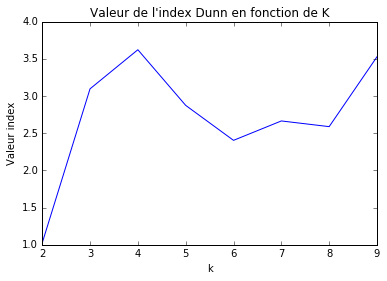

In [23]:
plt.plot(list_k,list_eval_Dunn)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Dunn en fonction de K")

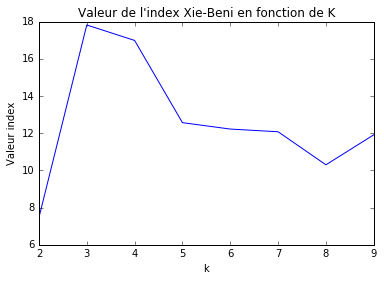

In [24]:
plt.plot(list_k,list_eval_XB)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Xie-Beni en fonction de K")

Nous devons minimiser les valeurs des indexes. Dans notre cas, il y a deux gaussiens différents et on remarque clairement dans les graphiques que le nombre de clusters optimal est de k=2

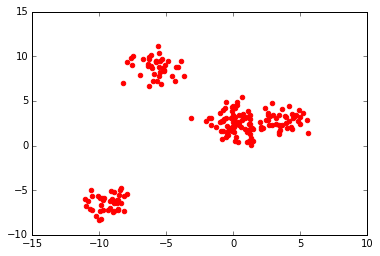

In [28]:
from sklearn.datasets import make_blobs

X, Y = make_blobs(n_samples=200, n_features=2, centers=5)

plt.scatter(X[:,0],X[:,1], color='r')
plt.show()
dfTest = pd.DataFrame(X,columns=['X','Y'])

In [30]:
list_k=[]
list_eval_Dunn=[]
list_eval_XB=[]


for k in range(2,10):
    centroids, l_affectation = km.kmoyennes(k, dfTest, 0.001, 100)
    list_k.append(k)
    list_eval_Dunn.append(evaluation("Dunn",dfTest,centroids,l_affectation))
    list_eval_XB.append(evaluation("XB",dfTest,centroids,l_affectation))
    

Iteration  0  Inertie :  3437.98641788  Difference :  6154.666137309416
Iteration  1  Inertie :  3437.98641788  Difference :  0.0
Iteration  0  Inertie :  2253.342425  Difference :  7339.310130185315
Iteration  1  Inertie :  1810.79762621  Difference :  442.54479879087876
Iteration  2  Inertie :  1014.8960477  Difference :  795.9015785175523
Iteration  3  Inertie :  753.832198514  Difference :  261.0638491809466
Iteration  4  Inertie :  753.832198514  Difference :  0.0
Iteration  0  Inertie :  2116.26866641  Difference :  7476.383888783643
Iteration  1  Inertie :  703.782615543  Difference :  1412.4860508627603
Iteration  2  Inertie :  416.372836927  Difference :  287.4097786152501
Iteration  3  Inertie :  390.490619891  Difference :  25.882217036026418
Iteration  4  Inertie :  390.490619891  Difference :  0.0
Iteration  0  Inertie :  326.34473601  Difference :  9266.307819178792
Iteration  1  Inertie :  322.564823468  Difference :  3.7799125420027053
Iteration  2  Inertie :  319.76035

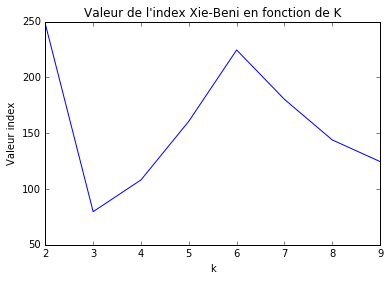

In [31]:
plt.plot(list_k,list_eval_XB)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Xie-Beni en fonction de K")

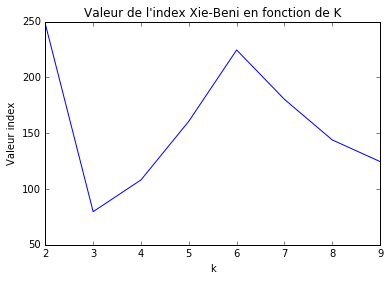

In [32]:
plt.plot(list_k,list_eval_XB)
plt.xlabel("k")
plt.ylabel("Valeur index")
plt.title("Valeur de l'index Xie-Beni en fonction de K")

Ici nous avons 5 gaussiens différents et on remarque qu'il y a 3 groupes de données très distincts donc la valeur de K optimale est k=3 d'après les observations sur le graphique.

## Application à des données réelles

- Appliquer l'algorithme aux données concernant les déchets de la ville de Paris
- Trouver des bases d'apprentissage intéressantes sur http://opendata.paris.fr/
